# Regression: diabetes dataset

Included with scikit-learn is the diabetes dataset. It contains 10 predictor variables and one target variable.
We will use this to explore various types of regression.

## Load and inspect the data


In [1]:
# the usual imports
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Load and have a look at the shape of the diabetes dataset. The column names are not included in the data, so we will specify them separately.

In [81]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.keys()

['data', 'target']


In [82]:
X = diabetes.data
y = diabetes.target

X.shape, y.shape

((442, 10), (442,))

To better inspect the data, build a pandas DataFrame from it.

In [4]:
column_names=['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']
df = pd.DataFrame(X, columns = column_names)
df['target'] = pd.Series(y)

Now, use pandas functionality to display (part of) the rows, summary values, and variable intercorrelations.
What can you say about the predictor variables?
Which predictor variables are most correlated with the target?
How about correlations between the predictors?

In [5]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135


In [6]:
df.describe()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [7]:
df.corr()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
map,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
tc,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
ldl,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
hdl,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
tch,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
ltg,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
glu,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


A nice way to inspect correlation strength is using a heatmap. The seaborn library has a heatmap function:

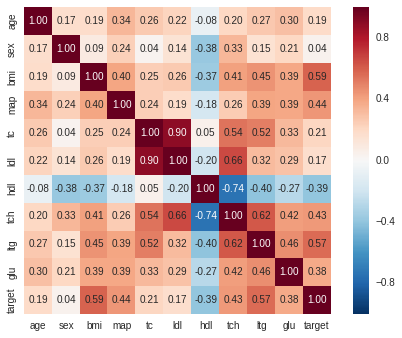

In [8]:
import seaborn as sns
plt.figure()
coefs = np.corrcoef(df.values.T)
sns.set(style='whitegrid')
hm = sns.heatmap(coefs, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=df.columns, xticklabels=df.columns) 
plt.show()
sns.reset_orig()

Using pandas' scattermatrix, we can check for nonlinear relationships:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b3219a410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4b2f2fe890>]], dtype=object)

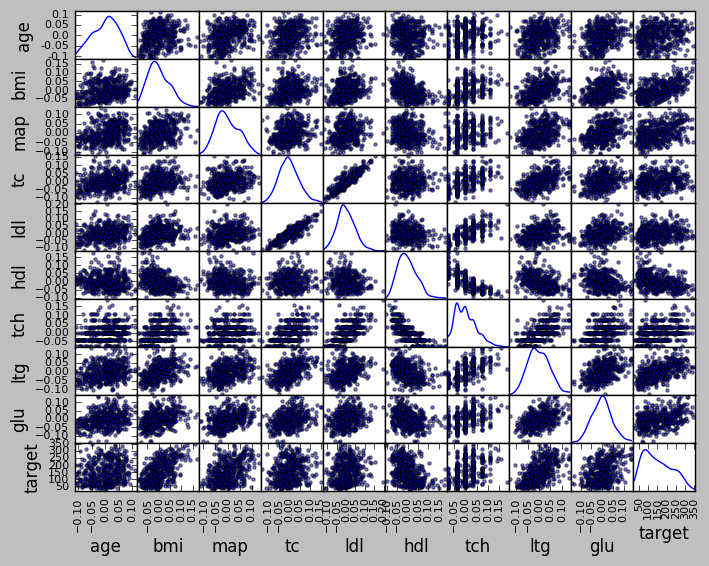

In [69]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df.drop('sex',1), diagonal='kde')

## Split into train and test sets

In [70]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    diabetes.data, diabetes.target, test_size=0.2, random_state=0)

## Linear Regression 
Now, perform linear regression on the training data.
What are the regression coefficients?

In [10]:
from sklearn import linear_model
lreg_model = linear_model.LinearRegression()
lreg_model.fit(X_train, y_train)

lreg_model.coef_

array([ -35.55683674, -243.1692265 ,  562.75404632,  305.47203008,
       -662.78772128,  324.27527477,   24.78193291,  170.33056502,
        731.67810787,   43.02846824])

How well does the model perform on the training data? Determine R square.

In [46]:
'R^2 (train): {}'.format(lreg_model.score(X_train, y_train))

'R^2 (train): 0.553928535742'

How well does the model perform on the test data? Determine R square.

In [47]:
'R^2 (test): {}'.format(lreg_model.score(X_test, y_test))

'R^2 (test): 0.332222032691'

## Ordinary Least Squares using statsmodels

We can use statsmodels to get p values for the model and the coefficients. How many coefficients are significant on the p=0.5 level?

In [83]:
import statsmodels.api as sm
sm_linear = sm.OLS(y_train, X_train)
sm_results = sm_linear.fit()
print sm_results.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     4.302
Date:                Tue, 28 Jun 2016   Prob (F-statistic):           1.13e-05
Time:                        21:49:42   Log-Likelihood:                -2294.3
No. Observations:                 353   AIC:                             4609.
Df Residuals:                     343   BIC:                             4647.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            53.2136    201.425      0.264      0.7

## Regularization - Lasso coefficient path

However, we have seen strong (positive and negative) intercorrelations among the predictors, so more predictors may be useful once we eliminate/reduce collinearity. Let's look at what happens when we introduce regularization. Plot the Lasso coefficient path:

In [84]:
from cycler import cycler
def coefficient_path(model, alphas, X, y):
  model = model
  coefs = []
  for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)
  plt.figure()
  ax = plt.gca()
  ax.set_prop_cycle(cycler('color', ['c', 'm', 'y', 'k', 'b', 'r', 'y', 'g']))
  ax.plot(alphas, coefs)
  ax.set_xscale('log')
  ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
  plt.xlabel('alpha')
  plt.ylabel('weights')
  plt.title('Coefficients as a function of the regularization')
  plt.axis('tight')
  plt.show()


In [85]:
alphas = np.logspace(-5, 2, 50)
alphas

array([  1.00000000e-05,   1.38949549e-05,   1.93069773e-05,
         2.68269580e-05,   3.72759372e-05,   5.17947468e-05,
         7.19685673e-05,   1.00000000e-04,   1.38949549e-04,
         1.93069773e-04,   2.68269580e-04,   3.72759372e-04,
         5.17947468e-04,   7.19685673e-04,   1.00000000e-03,
         1.38949549e-03,   1.93069773e-03,   2.68269580e-03,
         3.72759372e-03,   5.17947468e-03,   7.19685673e-03,
         1.00000000e-02,   1.38949549e-02,   1.93069773e-02,
         2.68269580e-02,   3.72759372e-02,   5.17947468e-02,
         7.19685673e-02,   1.00000000e-01,   1.38949549e-01,
         1.93069773e-01,   2.68269580e-01,   3.72759372e-01,
         5.17947468e-01,   7.19685673e-01,   1.00000000e+00,
         1.38949549e+00,   1.93069773e+00,   2.68269580e+00,
         3.72759372e+00,   5.17947468e+00,   7.19685673e+00,
         1.00000000e+01,   1.38949549e+01,   1.93069773e+01,
         2.68269580e+01,   3.72759372e+01,   5.17947468e+01,
         7.19685673e+01,

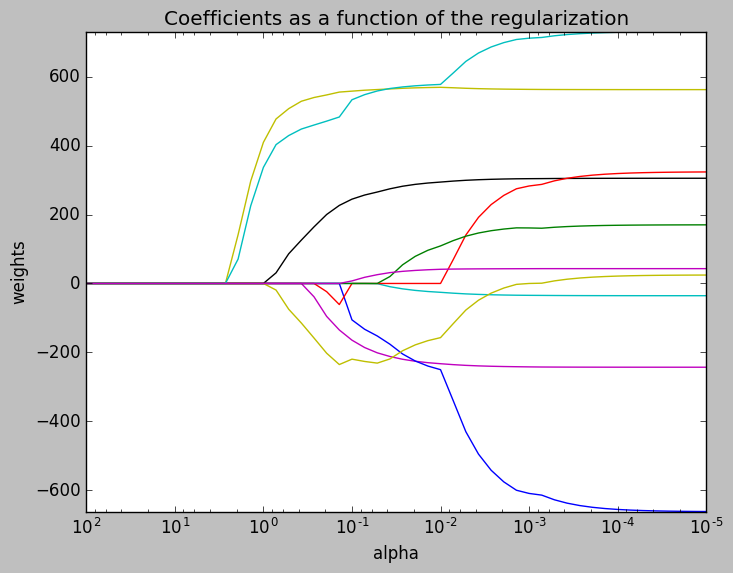

In [39]:
coefficient_path(linear_model.Lasso(), alphas, X_train, y_train)

## Lasso: 2 features

Now perform Lasso Regression to build a model with 2 features. What are the coefficients chosen by Lasso?
    

In [53]:
lasso_model = linear_model.Lasso(alpha=0.9)
lasso_model.fit(X_train, y_train)  
print('Coefficients: \n', lasso_model.coef_)

('Coefficients: \n', array([   0.        ,   -0.        ,  438.48972336,    0.        ,
          0.        ,    0.        ,   -0.        ,    0.        ,
        365.57102706,    0.        ]))


What are the p values reported by statsmodels for this 2-coefficient model?

In [58]:
sm_linear = sm.GLS(y_train, X_train[:,[2,8]])
sm_results = sm_linear.fit()
print sm_results.summary()

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.100
Model:                            GLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     19.46
Date:                Tue, 28 Jun 2016   Prob (F-statistic):           9.66e-09
Time:                        09:53:38   Log-Likelihood:                -2296.6
No. Observations:                 353   AIC:                             4597.
Df Residuals:                     351   BIC:                             4605.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1           640.9929    198.441      3.230      0.0

What are the R^2 values (train and test) for the 2 coefficient Lasso model?

In [55]:
'R^2 (train): {}, R^2 (test): {}'.format(lasso_model.score(X_train, y_train), lasso_model.score(X_test, y_test))

'R^2 (train): 0.420263624863, R^2 (test): 0.270583553319'

## Lasso: 4 features

Now try Lasso Regression with 4 features. What are the coefficients chosen by Lasso?
    

In [59]:
lasso_model = linear_model.Lasso(alpha=0.6)
lasso_model.fit(X_train, y_train)  
print('Coefficients: \n', lasso_model.coef_)

('Coefficients: \n', array([   0.        ,   -0.        ,  495.34768084,   63.63473945,
         -0.        ,   -0.        ,  -52.17023798,    0.        ,
        418.6789422 ,    0.        ]))


What are the p values reported by statsmodels for this 2-coefficient model?

In [60]:
sm_linear = sm.GLS(y_train, X_train[:,[2,3,6,8]])
sm_results = sm_linear.fit()
print sm_results.summary()

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.105
Model:                            GLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     10.28
Date:                Tue, 28 Jun 2016   Prob (F-statistic):           6.98e-08
Time:                        09:54:57   Log-Likelihood:                -2295.5
No. Observations:                 353   AIC:                             4599.
Df Residuals:                     349   BIC:                             4614.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1           531.0145    212.421      2.500      0.0

What are the R^2 values (train and test) for the 4 coefficient Lasso model?

In [61]:
'R^2 (train): {}, R^2 (test): {}'.format(lasso_model.score(X_train, y_train), lasso_model.score(X_test, y_test))

'R^2 (train): 0.474738856652, R^2 (test): 0.310150276773'

## Nonlinear regression: k Nearest Neighbors

Even though the predictors and the target variable look rather linearly correlated, let's try if a nonlinear method delivers better performance.

Perform k nearest neighbors regression with different numbers for k and compare accuracies for test and training set.
Does k nearest neighbors regression perform better than linear regression?

(Note: To determine the best k, you would normally use a validation set or perform cross validation. The fact that we compute accuracies on the test set for different values of k is for quick overview only.)

In [80]:
from sklearn import neighbors
n_neighbors = [3,5,10,20,30,40,50]
weight = 'distance'

for n in n_neighbors:
    print('knn (n = {})'.format(n))
    knn_model = neighbors.KNeighborsRegressor(n, weights = weight)
    knn_model.fit(X_train, y_train)
    print 'R^2 (train): {}, R^2 (test): {}\n'.format(knn_model.score(X_train, y_train), knn_model.score(X_test, y_test))

knn (n = 3)
R^2 (train): 1.0, R^2 (test): 0.125400384896

knn (n = 5)
R^2 (train): 1.0, R^2 (test): 0.167418155444

knn (n = 10)
R^2 (train): 1.0, R^2 (test): 0.265905059144

knn (n = 20)
R^2 (train): 1.0, R^2 (test): 0.321428002163

knn (n = 30)
R^2 (train): 1.0, R^2 (test): 0.362409450457

knn (n = 40)
R^2 (train): 1.0, R^2 (test): 0.353437193435

knn (n = 50)
R^2 (train): 1.0, R^2 (test): 0.336051588952



What's your conclusion regarding KNN regression?